In [1]:
#!pip install missingno 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymongo
import json
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
%matplotlib inline
import missingno as msno


In [3]:
data = pd.read_csv(r"D:\Ineuron\Libraries for Manipulation and visualization\Dataset\data6\blackFriday_train.csv")

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.shape

(550068, 12)

In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### In Product_Category_2 and Product_Category_3 have null data and those are float datatypes

In [8]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
data['Product_Category_2'].mean()

9.842329251122386

In [10]:
data['Product_Category_3'].mean()

12.668243206790512

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,NaN,NaN,NaN,9.842329,5.08659,2.0,5.0,9.0,15.0,18.0


In [12]:
data_cat = [num for num in data.columns if data[num].dtype == 'O'] 
        

In [13]:
data_num = [num for num in data.columns if data[num].dtype != 'O'] 

In [14]:
data[data_cat]

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


In [15]:
data[data_num]

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
550063,1006033,13,1,20,NaN,NaN,368
550064,1006035,1,0,20,NaN,NaN,371
550065,1006036,15,1,20,NaN,NaN,137
550066,1006038,1,0,20,NaN,NaN,365


C:\Users\tumat\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

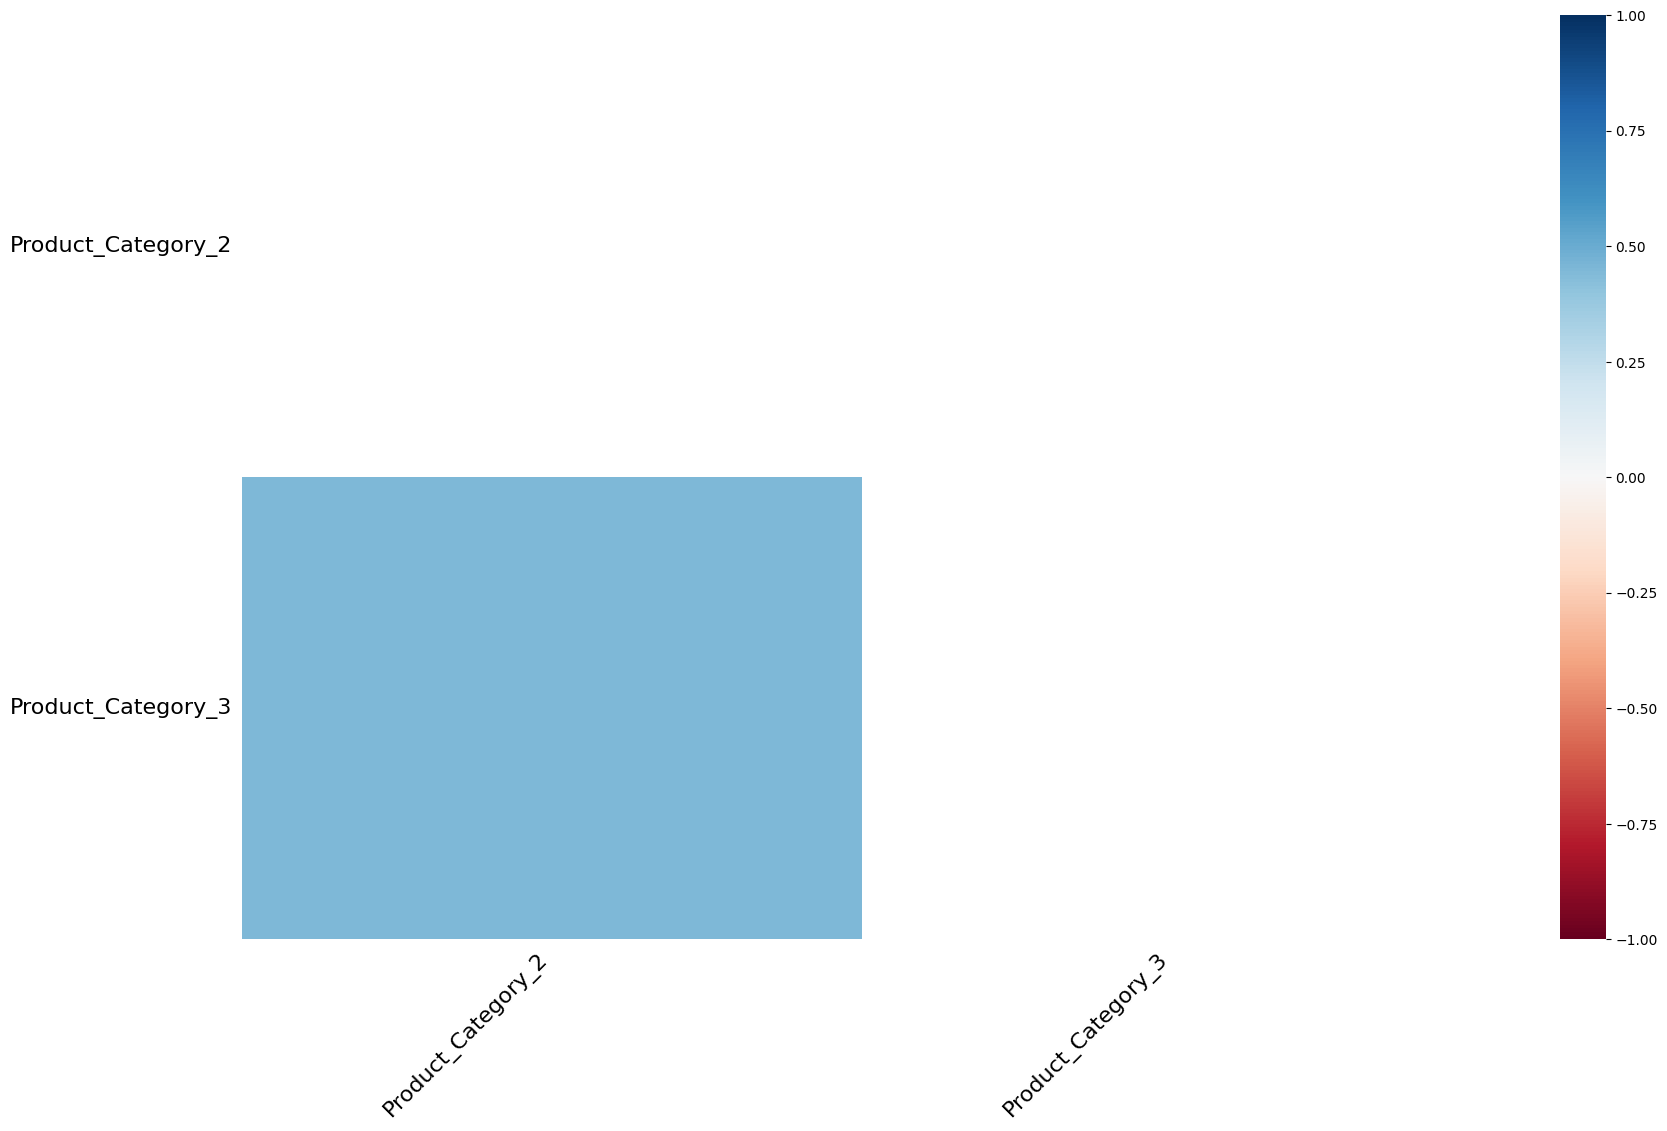

In [16]:
msno.heatmap(data)

## BarChart

<Axes: >

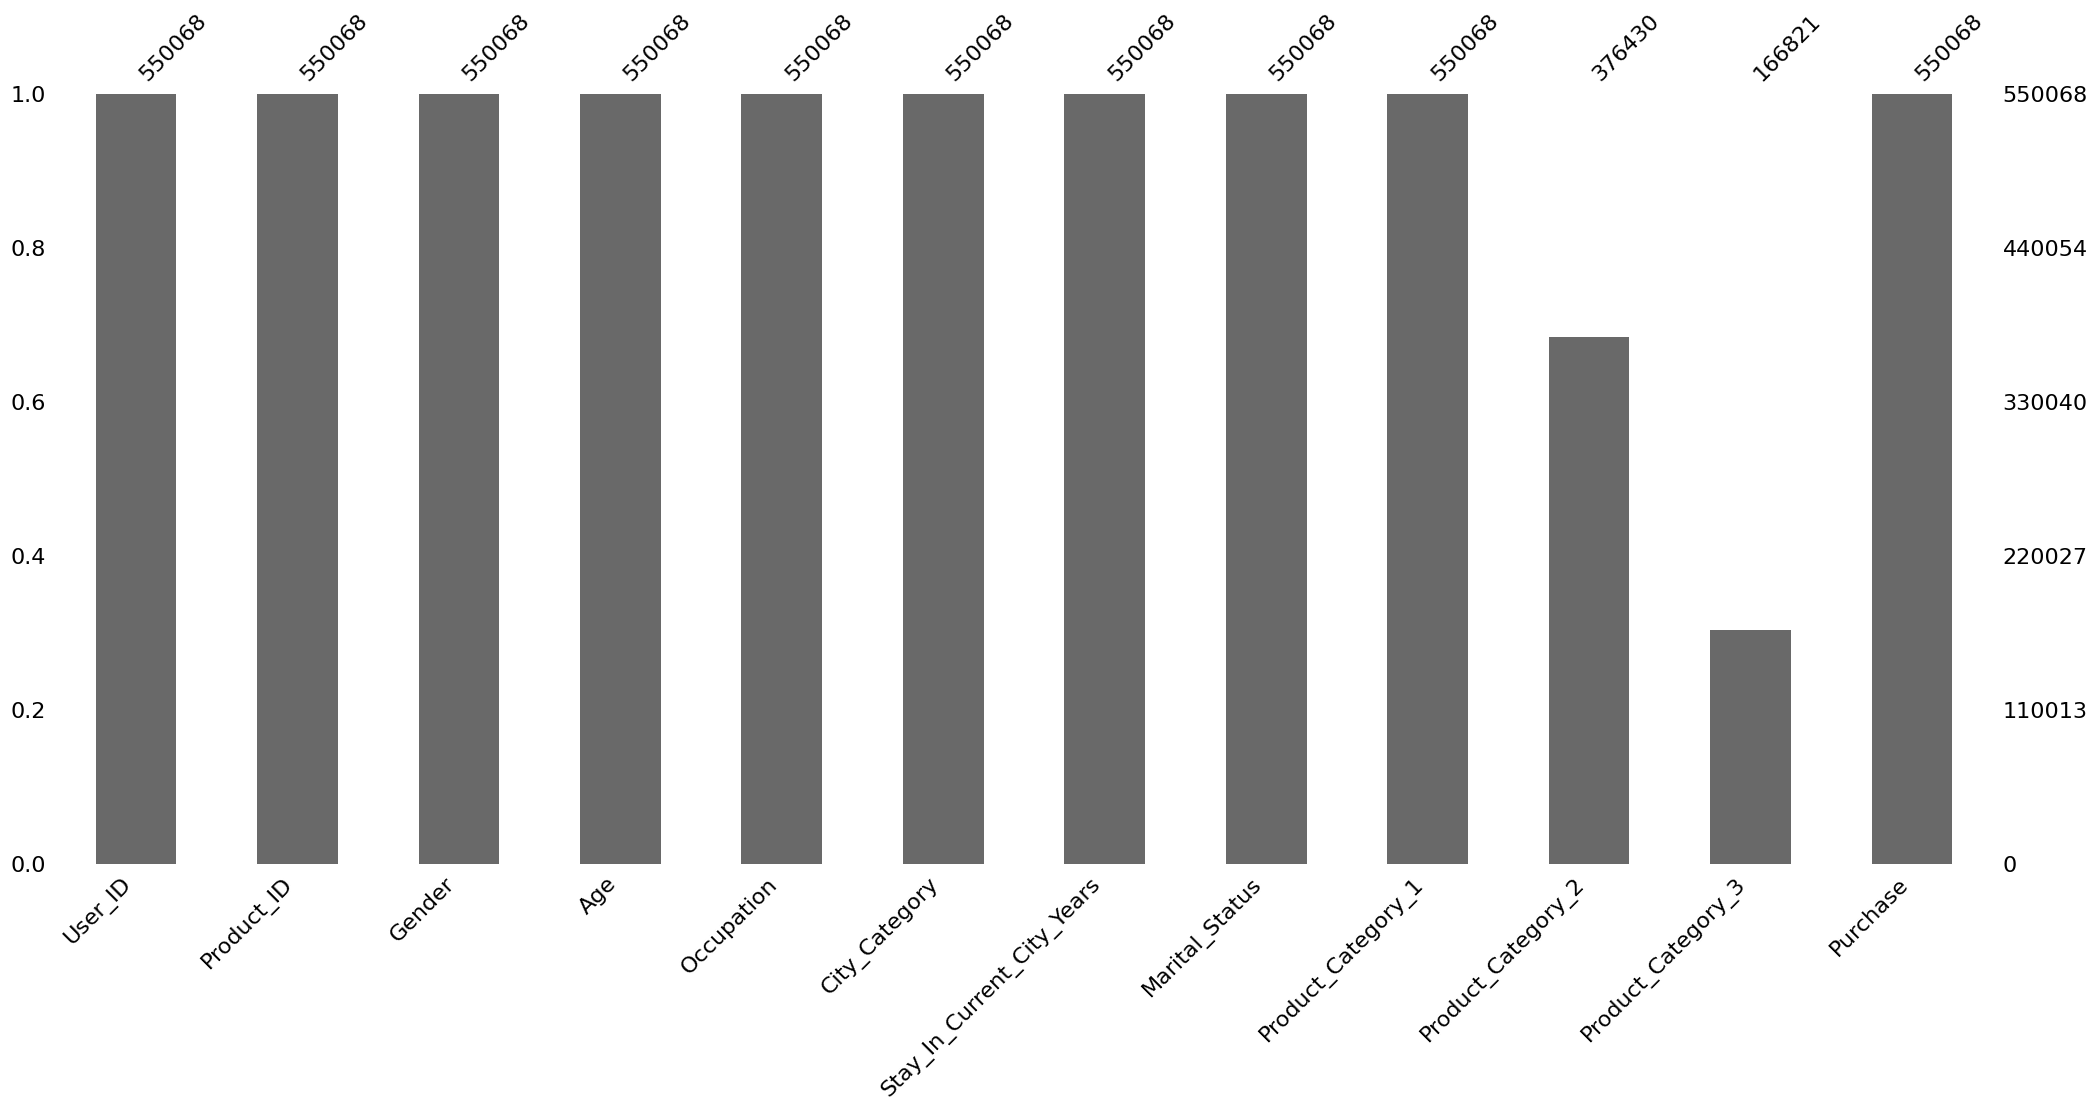

In [17]:
msno.bar(data)


## Matrics

<Axes: >

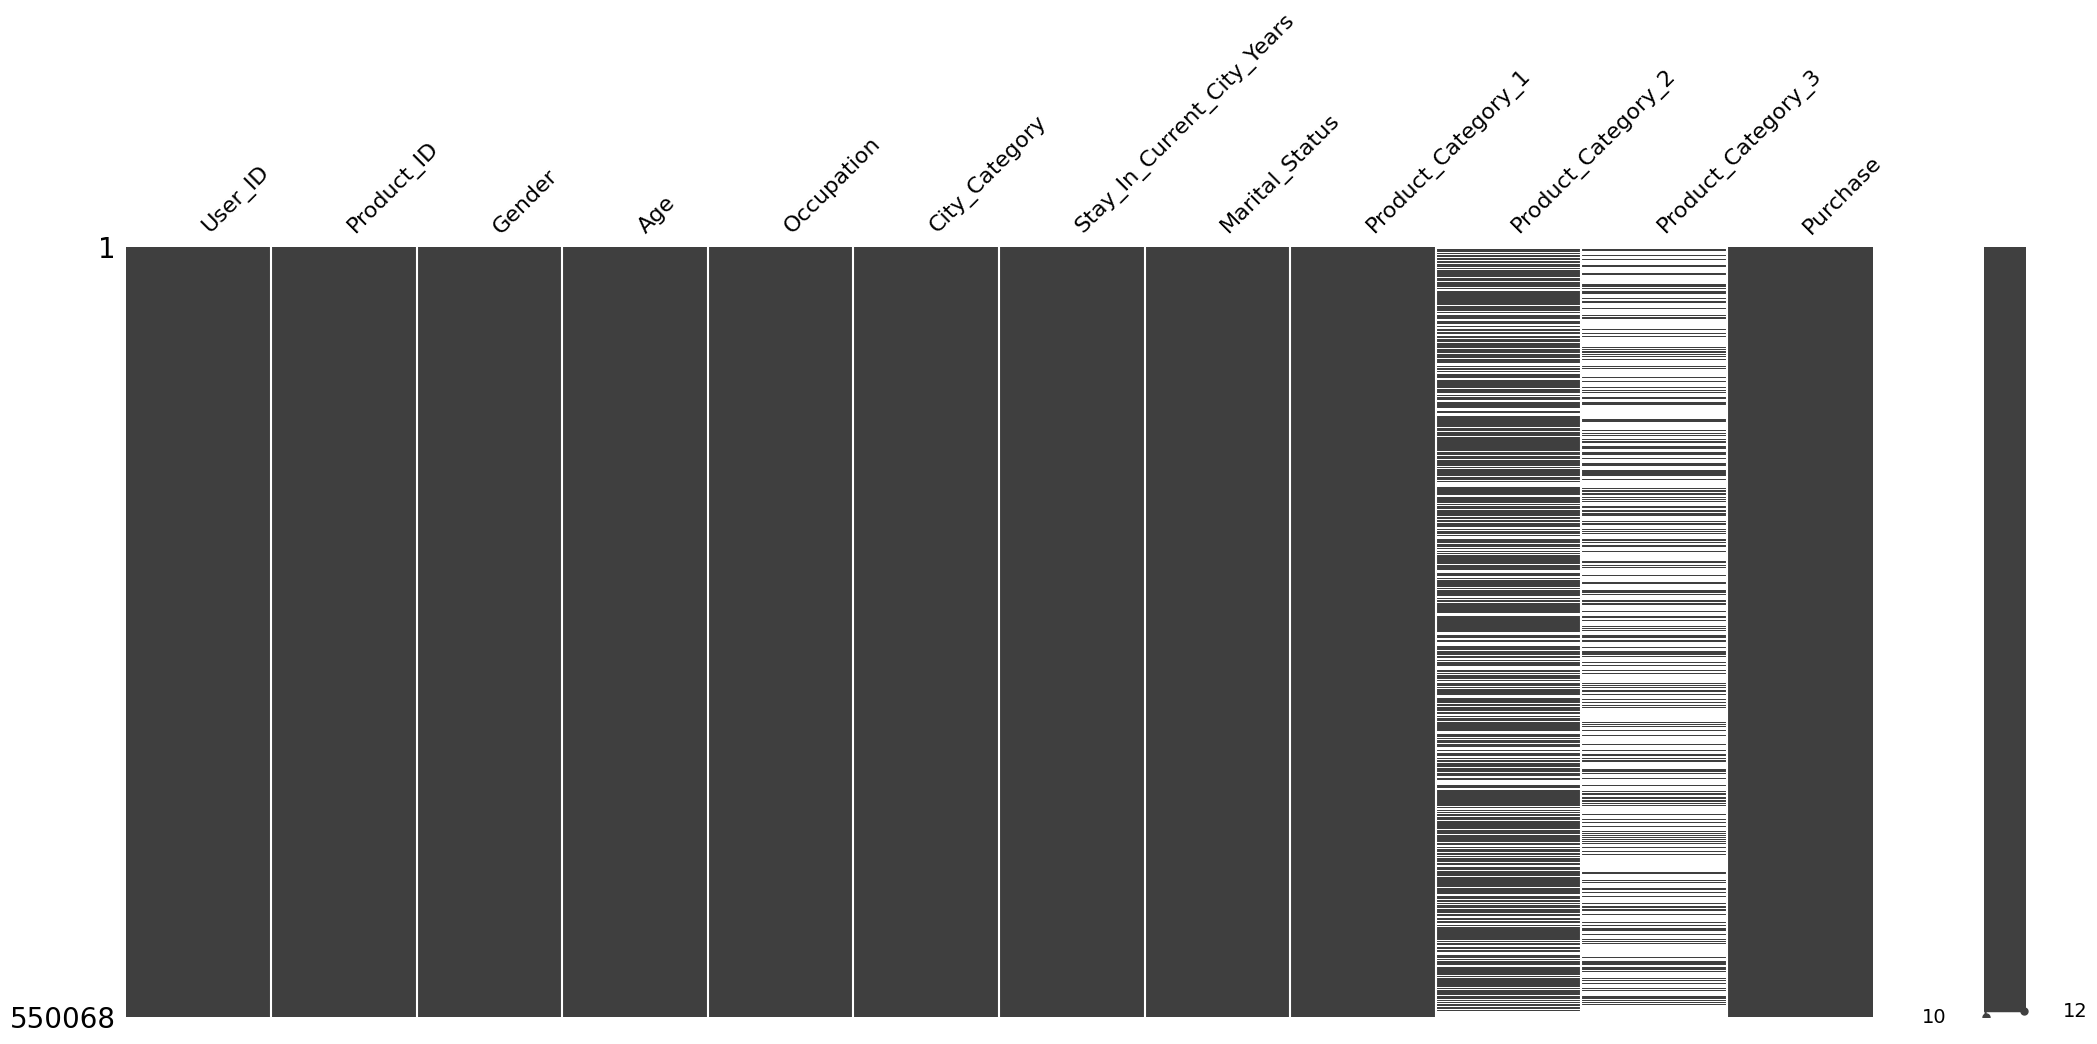

In [18]:
msno.matrix(data)

## Dendrogram

<Axes: >

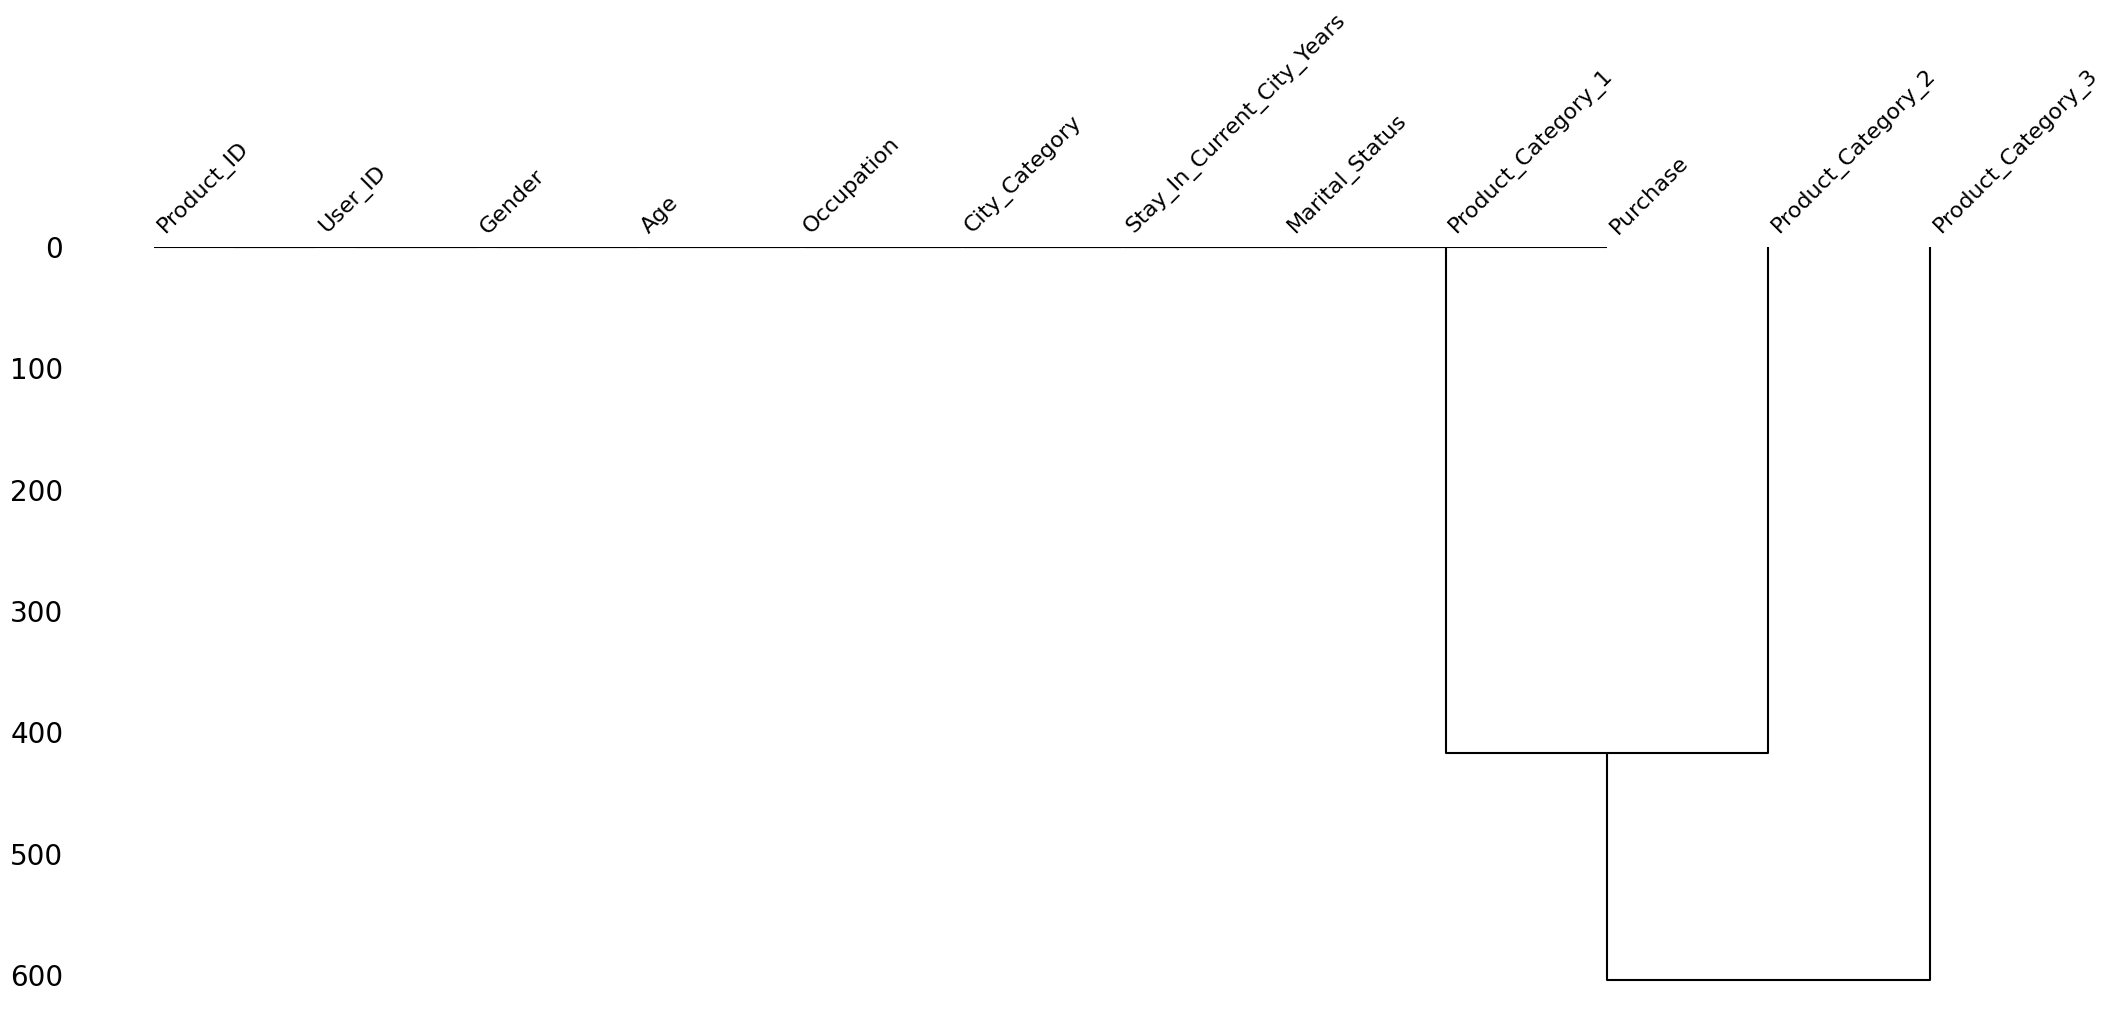

In [19]:
msno.dendrogram(data)

In [20]:
features_with_null_values=[features for features in data.columns if data[features].isnull().sum()>=1]

In [21]:
features_with_null_values

['Product_Category_2', 'Product_Category_3']

In [22]:
for feature in features_with_null_values:
    print(feature, np.round(data[feature].isnull().mean()*100, 2),' % missing values')

Product_Category_2 31.57  % missing values
Product_Category_3 69.67  % missing values


## Missing Values

####  method:-1

In [23]:
data1= data.fillna('0')

In [24]:
data1.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

#### method2:-

## droping missing values

In [25]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [26]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [27]:
data2= data.dropna()


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  object 
 3   Age                         166821 non-null  object 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 16.5+ MB


In [29]:
data2.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Random Sample Imputation

In [30]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [31]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [32]:
data3 = data[["Product_Category_2","Product_Category_3"]]

In [33]:
data3

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
...,...,...
550063,NaN,NaN
550064,NaN,NaN
550065,NaN,NaN
550066,NaN,NaN


In [34]:
data3.isnull().sum()

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [35]:
data3.isnull().mean()

Product_Category_2    0.315666
Product_Category_3    0.696727
dtype: float64

In [36]:
data3['Product_Category_2'].dropna().sample(data3['Product_Category_2'].isnull().sum(),random_state=0)

272748    14.0
303700    14.0
191644    15.0
286636     5.0
175047     2.0
          ... 
401271     2.0
104629     5.0
33093     15.0
262468    14.0
491461    16.0
Name: Product_Category_2, Length: 173638, dtype: float64

In [37]:
data3[data3['Product_Category_2'].isnull()].index

Int64Index([     0,      2,      4,      9,     11,     12,     21,     22,
                23,     26,
            ...
            550058, 550059, 550060, 550061, 550062, 550063, 550064, 550065,
            550066, 550067],
           dtype='int64', length=173638)

In [45]:
def impute_nan(data, variable):
    # Create a new column to store the imputed values
    data[variable + "_random"] = data[variable]
    
    # Obtain random samples from non-missing values
    random_samples = data[variable].dropna().sample(data[variable].isnull().sum(), random_state=0)
    
    # Set the index of random samples to match the index of missing values
    random_samples.index = data[data[variable].isnull()].index
    
    # Assign the random samples to missing values in the new column
    data.loc[data[variable].isnull(), variable + '_random'] = random_samples


In [39]:
def impute_nan(data3, variable):
    # Obtain random samples from non-missing values
    random_samples = data3[variable].dropna().sample(data3[variable].isnull().sum(), random_state=0)
    
    # Set the index of random samples to match the index of missing values
    random_samples.index = data3[data3[variable].isnull()].index
    
    # Assign the random samples to missing values in the original column
    data3.loc[data3[variable].isnull(), variable] = random_samples

In [40]:
def impute_nan(data3, variable):
    # Create a new column to store the imputed values
    data3[variable + "_imputed"] = 0
    
    # Obtain random samples from non-missing values
    random_samples = data3[variable].dropna().sample(data3[variable].isnull().sum(), random_state=0)
    
    # Set the index of random samples to match the index of missing values
    random_samples.index = data3[data3[variable].isnull()].index
    
    # Make a copy of the DataFrame to avoid SettingWithCopyWarning
    data_copy = data3.copy()
    
    # Assign the random samples to missing values in the original column
    data_copy.loc[data3[variable].isnull(), variable] = random_samples
    
    # Update the flag to indicate imputed values
    data_copy.loc[data_copy[variable+"_imputed"].isnull(), variable+"_imputed"] = 1
    
    return data_copy


In [46]:
impute_nan(data3,"Product_Category_2")

C:\Users\tumat\AppData\Local\Temp\ipykernel_17372\4278603419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable + "_random"] = data[variable]


In [47]:
data3

,Product_Category_2,Product_Category_3,Product_Category_2_imputed,Product_Category_2_random
0,NaN,NaN,0,14.0
1,6.0,14.0,0,6.0
2,NaN,NaN,0,14.0
3,14.0,NaN,0,14.0
4,NaN,NaN,0,15.0
...,...,...,...,...
550063,NaN,NaN,0,2.0
550064,NaN,NaN,0,5.0
550065,NaN,NaN,0,15.0
550066,NaN,NaN,0,14.0


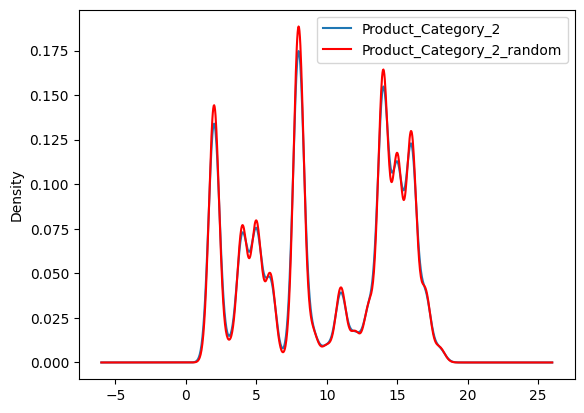

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
data3['Product_Category_2'].plot(kind='kde', ax=ax)
data3.Product_Category_2_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Mean/ Median /Mode imputation

In [49]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [51]:
data4 = data.copy()

In [52]:
data4 = data[["Product_Category_2","Product_Category_3"]]

In [53]:
data4.head()

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN


In [54]:
data4.isnull().mean()*100

Product_Category_2    31.566643
Product_Category_3    69.672659
dtype: float64

In [55]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [56]:
median=data4.Product_Category_2.median()
median

9.0

In [57]:
impute_nan(data4,'Product_Category_2',median)
data4.head()

C:\Users\tumat\AppData\Local\Temp\ipykernel_17372\3352221935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_median"]=df[variable].fillna(median)


,Product_Category_2,Product_Category_3,Product_Category_2_median
0,NaN,NaN,9.0
1,6.0,14.0,6.0
2,NaN,NaN,9.0
3,14.0,NaN,14.0
4,NaN,NaN,9.0


In [58]:
print(data4['Product_Category_2'].std())
print(data4['Product_Category_2_median'].std())

5.08658964870293
4.226025174967703


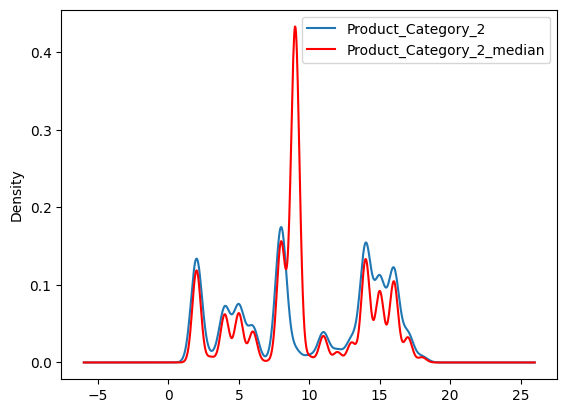

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
data4['Product_Category_2'].plot(kind='kde', ax=ax)
data4.Product_Category_2_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Capturing NAN values with a new feature

In [60]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [61]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [62]:
data5 = data[["Product_Category_2","Product_Category_3"]]

In [63]:
data5

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
...,...,...
550063,NaN,NaN
550064,NaN,NaN
550065,NaN,NaN
550066,NaN,NaN


In [64]:
data5.isnull().sum()

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [65]:
np.where(data5["Product_Category_2"].isnull().sum(),1,0)

array(1)

In [66]:
import numpy as np
data5['Product_Category_2_NAN']=np.where(data5['Product_Category_2'].isnull(),1,0)

C:\Users\tumat\AppData\Local\Temp\ipykernel_17372\1626301150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['Product_Category_2_NAN']=np.where(data5['Product_Category_2'].isnull(),1,0)


In [67]:
data5

,Product_Category_2,Product_Category_3,Product_Category_2_NAN
0,NaN,NaN,1
1,6.0,14.0,0
2,NaN,NaN,1
3,14.0,NaN,0
4,NaN,NaN,1
...,...,...,...
550063,NaN,NaN,1
550064,NaN,NaN,1
550065,NaN,NaN,1
550066,NaN,NaN,1


In [68]:
data5["Product_Category_2_NAN"].value_counts()

0    376430
1    173638
Name: Product_Category_2_NAN, dtype: int64

## End of Distribution imputation

In [69]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [70]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [71]:
data6 = data[["Product_Category_2","Product_Category_3"]]

In [72]:
data6

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
...,...,...
550063,NaN,NaN
550064,NaN,NaN
550065,NaN,NaN
550066,NaN,NaN


In [73]:
data6.isnull().sum()

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [74]:
data6['Product_Category_2'].max()

18.0

In [75]:
data6['Product_Category_3'].max()

18.0

In [76]:
data6['Product_Category_2'].std()

5.08658964870293

<Axes: >

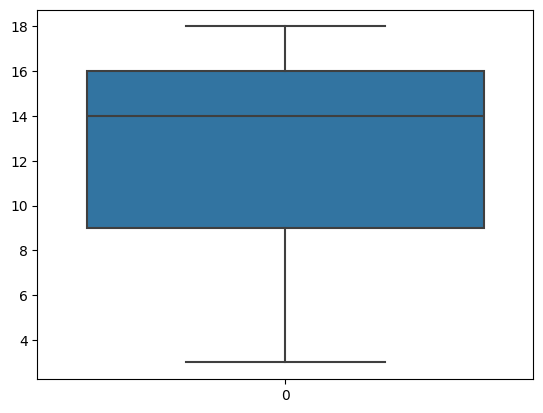

In [77]:
sns.boxplot(data6['Product_Category_3'])

## using different model or  Predicting The Missing Values

In [78]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [79]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [80]:
data7 = data[["Product_Category_2","Product_Category_3"]]

In [82]:
data7

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
...,...,...
550063,NaN,NaN
550064,NaN,NaN
550065,NaN,NaN
550066,NaN,NaN


In [84]:
data7.isnull().sum()

Product_Category_2    173638
Product_Category_3    383247
dtype: int64